# **FASHION MNIST/ Gary Nico (2101641910)**

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.optimizers import Adam

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import itertools

##Data Exploration with Pandas

Kami ingin mengetahui/mengenal isi dan info-info dari dataset Fashion MNIST. Libary Pandas digunakan karena sangat simple untuk kepentingan analysis.



In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ymattu/fashion-mnist-csv/master/fashion_test.csv")

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, V1 to y
dtypes: int64(785)
memory usage: 6.0 MB


In [0]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V746,V747,V748,V749,V750,V751,V752,V753,V754,V755,V756,V757,V758,V759,V760,V761,V762,V763,V764,V765,V766,V767,V768,V769,V770,V771,V772,V773,V774,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,1,3,2,0,0,2,0,0,0,0,0,0,0,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,46,145,199,177,...,191,171,69,10,215,201,102,0,0,0,0,0,0,0,0,0,24,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,117,25,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,11,107,6,0,0,0,0,0,3,69,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,49,68,83,215,210,...,0,0,1,0,0,218,221,211,0,0,0,0,0,0,14,107,143,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,147,162,104,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,87,78,0,0,0,0,141,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,207,225,229,...,227,221,230,189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,125,137,160,137,114,123,120,101,58,20,3,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,69,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,185,207,89,0,...,232,232,236,247,238,255,76,0,0,0,0,0,0,0,0,1,0,14,126,122,165,193,210,226,234,233,233,236,234,229,229,215,175,145,5,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


##Import dataset with TensorFlow

Langsung import test data dan train data Fashion MNIST dari tensorflow

x = images (features) | y = label (target)

In [0]:
fminst = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Data Visualization with PyPlot

In [0]:
# Memperlihatkan jumlah data di train & test set, juga pixel nya
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Memberikan nama label karena ada bermacam-macam berurutan sesuai index
fashion_mnist_labels = ["T-shirt/top",  
                        "Trouser",      
                        "Pullover",     
                        "Dress",        
                        "Coat",         
                        "Sandal",       
                        "Shirt",        
                        "Sneaker",      
                        "Bag",          
                        "Ankle boot"]   

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


Index ke: 9
Label: Ankle boot


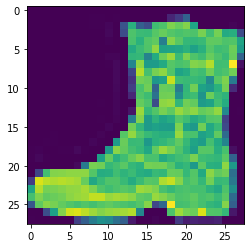

In [0]:
# Print salah satu image dari dataset, misalnya index yang ke 150

img_index = 150
label_index = y_train[img_index]
print ("Index ke: " + str(label_index))
print("Label: " + (fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

## Data Normalization
Karena banyak features yang bernilai kosong (0) dan ada juga yang langsung bernilai besar (ratusan), maka lebih data akan di normalisasikan ke dalam bentuk binary (0 - 1) agar merata.

Label TIDAK dinormalisasi.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# Untuk mengecek keberhasilan normalisasi (un-comment line dibawah ini untuk melihat)
# print(x_train[0])

## Split data 
Kita akan bagi dataset menjadi (sesuai request dosen di kelas):
1. Train = 48.000 dari train data
2. Validation = 12.000 dari train data
3. Test = 10.000 (test data)

In [0]:
(x_train, x_val) = x_train[:48000], x_train[48000:]
(y_train, y_val) = y_train[:48000], y_train[48000:]

w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_val = x_val.reshape(x_val.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# Lakukan one hot encoding pada label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print dan pastikan jumla dataset benar
print(x_train.shape[0], 'train set')
print(x_val.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

48000 train set
12000 validation set
10000 test set


#Building Model (1)
1. Convolutional: (Height, Width) = ( ( W − F + 2P ) / S ) + 1.
2. Pooling: untuk Dimensionality Reduction atau Down Sampling inputan.
3. Dropout: mengecilkan jumlah persentase dari neuron.

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________

#Compiling Model (1)
Kita menggunakan Adam Optimizer yang merupakan stochastic optimizer, untuk selengkapnya bisa dibaca di: https://arxiv.org/abs/1412.6980v8.

Dikarenakan FashionMnist merupakan Multiclass Classification, maka kita menggunakan categorical_crossentropy.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#Training (1)
Untuk training model kami menggunakan fit() yang akan me-return informasi hasil training seperti: training error dan accuracy juga validasi error dan accuracy  
untuk setiap 10 epoch (jumlah epoch dapat diganti di parameter). 

In [0]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val), callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.6226 - acc: 0.7692
Epoch 00001: val_loss improved from inf to 0.40633, saving model to model.weights.best.hdf5
48000/48000 [==============================] - 59s 1ms/sample - loss: 0.6227 - acc: 0.7692 - val_loss: 0.4063 - val_acc: 0.8565
Epoch 2/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.4299 - acc: 0.8443
Epoch 00002: val_loss improved from 0.40633 to 0.35078, saving model to model.weights.best.hdf5
48000/48000 [==============================] - 59s 1ms/sample - loss: 0.4297 - acc: 0.8444 - val_loss: 0.3508 - val_acc: 0.8742
Epoch 3/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.3766 - acc: 0.8641
Epoch 00003: val_loss improved from 0.35078 to 0.30806, saving model to model.weights.best.hdf5
48000/48000 [==============================] - 60s 1ms/sample - loss: 0.3766 - acc: 0.8641 - val_loss: 0.3081 - val_acc: 0.88

#Evaluating Model(1)

Dengan data testing.


In [0]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test lost percentage:', score[0]*100, '%')
print('Test accuracy percentage:', score[1]*100, '%')

Test lost percentage: 25.141771914958955 %
Test accuracy percentage: 90.71000218391418 %


#Plot: Training Accuracy and Validation Accuracy (1)
Menggunakan plot curves.

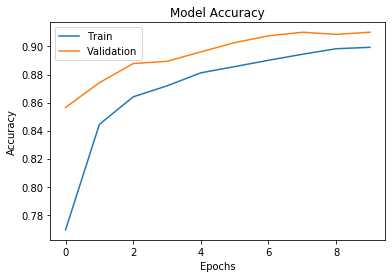

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

#Confusion Matrix (1)
Jumlah class sesuai dengan jumlah label (label tersimpan di variabel **fashion_mnist_labels**).

In [0]:
#Function Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

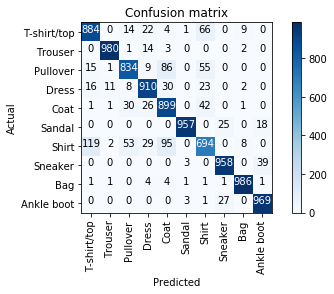

In [0]:
# Dari data testing
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 

# Menghitung confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# Plot
plot_confusion_matrix(confusion_mtx, classes = fashion_mnist_labels)

#Classification Report (1)
Accuracy, Precision, Recall dan F1 Score.

In [0]:
print(classification_report(y_true, y_pred_classes, target_names = fashion_mnist_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.87      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.89      0.83      0.86      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.80      0.90      0.85      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.79      0.69      0.74      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.94      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#Visualisasi Hasil Prediksi (1)
Kita mengambil 10 gambar random dari test image lalu di plot, jika hasil prediksi benar maka warna title akan **hijau**, jika salah maka warna title akan **merah**.


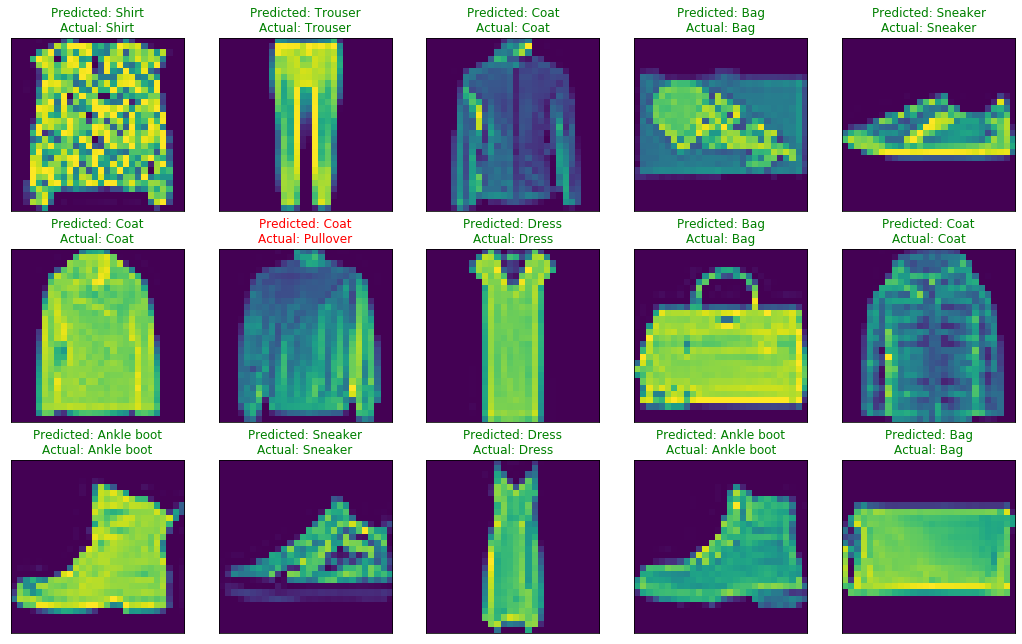

In [0]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(18, 11))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Show image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Title
    ax.set_title("Predicted: {}\nActual: {}".
                 format(fashion_mnist_labels[predict_index], 
                  fashion_mnist_labels[true_index]),
                  color=("green" if predict_index == true_index else "red"))

#Building Model (2)
1. Convolutional: (Height, Width) = ( ( W − F + 2P ) / S ) + 1.
2. Pooling: untuk Dimensionality Reduction atau Down Sampling inputan.
3. Dropout: mengecilkan jumlah persentase dari neuron.
4. Batch Normalization: menaikan kecepatan dan akurasi dari neural networks.

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 128)        

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#Training(2)


In [68]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val), callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
47936/48000 [============================>.] - ETA: 0s - loss: 0.2465 - acc: 0.9094
Epoch 00001: val_loss improved from inf to 0.23404, saving model to model.weights.best.hdf5
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.2465 - acc: 0.9094 - val_loss: 0.2340 - val_acc: 0.9133
Epoch 2/5
47936/48000 [============================>.] - ETA: 0s - loss: 0.2439 - acc: 0.9085
Epoch 00002: val_loss did not improve from 0.23404
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.2440 - acc: 0.9085 - val_loss: 0.2343 - val_acc: 0.9143
Epoch 3/5
47936/48000 [============================>.] - ETA: 0s - loss: 0.2427 - acc: 0.9109
Epoch 00003: val_loss did not improve from 0.23404
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.2427 - acc: 0.9109 - val_loss: 0.2390 - val_acc: 0.9143
Epoch 4/5
47936/48000 [============================>.] - ETA: 0s - loss: 0.2386 - acc: 0.9

#Evaluating Model(2)

In [69]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test lost percentage:', score[0]*100, '%')
print('Test accuracy percentage:', score[1]*100, '%')

Test lost percentage: 24.109923591613768 %
Test accuracy percentage: 91.06000065803528 %


#Plot: Training Accuracy and Validation Accuracy (2)

---




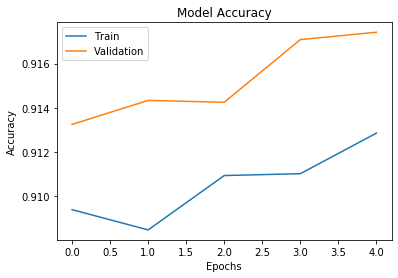

In [70]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

#Confusion Matrix (2)

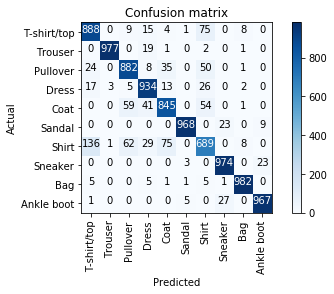

In [71]:
# Dari data testing
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 

# Menghitung confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# Plot
plot_confusion_matrix(confusion_mtx, classes = fashion_mnist_labels)

#Classification Report (2)

In [72]:
print(classification_report(y_true, y_pred_classes, target_names = fashion_mnist_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.88      0.87      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.87      0.84      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.76      0.69      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#Visualisasi Hasil Prediksi (2)

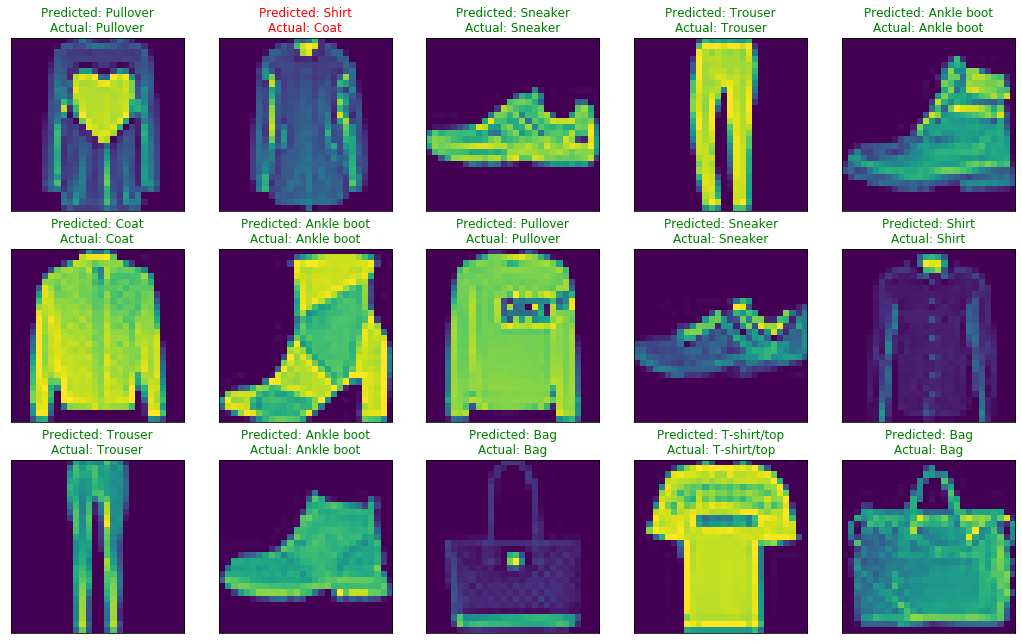

In [74]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(18, 11))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Show image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Title
    ax.set_title("Predicted: {}\nActual: {}".
                 format(fashion_mnist_labels[predict_index], 
                  fashion_mnist_labels[true_index]),
                  color=("green" if predict_index == true_index else "red"))

#Conclusion
Kedua model dapat memprediksi dengan baik dan memiliki nilai accuracy yang identik (diatas 90%). 